In [ ]:
#Social_Networks_Ads.csv

**Importing the libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, confusion_matrix, f1_score

**Importing the dataset**

In [ ]:
df = pd.read_csv('/content/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df1 = df.drop(columns="User ID")

In [ ]:
df1.Gender = df.Gender.map({'Male': 0, 'Female': 1})

In [ ]:
df1.head()

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0


**Splitting the dataset into the Training set and Test set**

In [ ]:
X = df1[['Gender', 'Age', 'EstimatedSalary']].values 
y = df1['Purchased'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**Feature Scaling**

In [ ]:
scaler = StandardScaler() 
scaler.fit(X_train,y_train) 
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)

**Fitting K-NN to the Training set**

In [ ]:
for i in [1,2,3,4,5,6,7,8,9,10,20,50]:
  knn = KNeighborsClassifier(i) #initialising the model
  knn.fit(X_train_scaled,y_train) # training the model
  print("K value  : " , i, " train score : ", knn.score(X_train_scaled,y_train) , " score : ", np.mean(cross_val_score(knn, X_train_scaled, y_train, cv=10))) #predicting using the model


K value  :  1  train score :  1.0  score :  0.859375
K value  :  2  train score :  0.921875  score :  0.834375
K value  :  3  train score :  0.91875  score :  0.8875
K value  :  4  train score :  0.9  score :  0.884375
K value  :  5  train score :  0.909375  score :  0.896875
K value  :  6  train score :  0.90625  score :  0.884375
K value  :  7  train score :  0.90625  score :  0.8875
K value  :  8  train score :  0.90625  score :  0.89375
K value  :  9  train score :  0.896875  score :  0.896875
K value  :  10  train score :  0.909375  score :  0.896875
K value  :  20  train score :  0.9  score :  0.8875
K value  :  50  train score :  0.79375  score :  0.765625


In [ ]:
knn = KNeighborsClassifier(5)
knn.fit(X_train_scaled,y_train)
knn.score(X_test_scaled,y_test)

0.95

**Predicting the Test set results**

In [ ]:
y_pred=knn.predict(X_test_scaled)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1])

**Making the Confusion Matrix**

In [ ]:
confusion_matrix(y_test,y_pred)

array([[55,  3],
       [ 1, 21]])

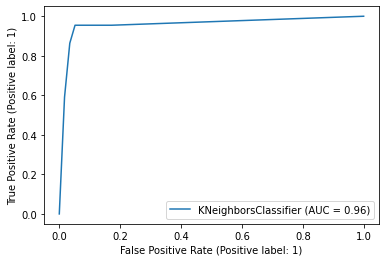

In [ ]:
f1_score(y_test,y_pred)
knn.score(X_test_scaled,y_test)
plot_roc_curve(knn, X_test_scaled, y_test)